In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://query.data.world/s/tz5fdncop5de2c66owkyupemkhgf7y')
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [3]:
df.shape

(400, 5)

In [4]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## EDA

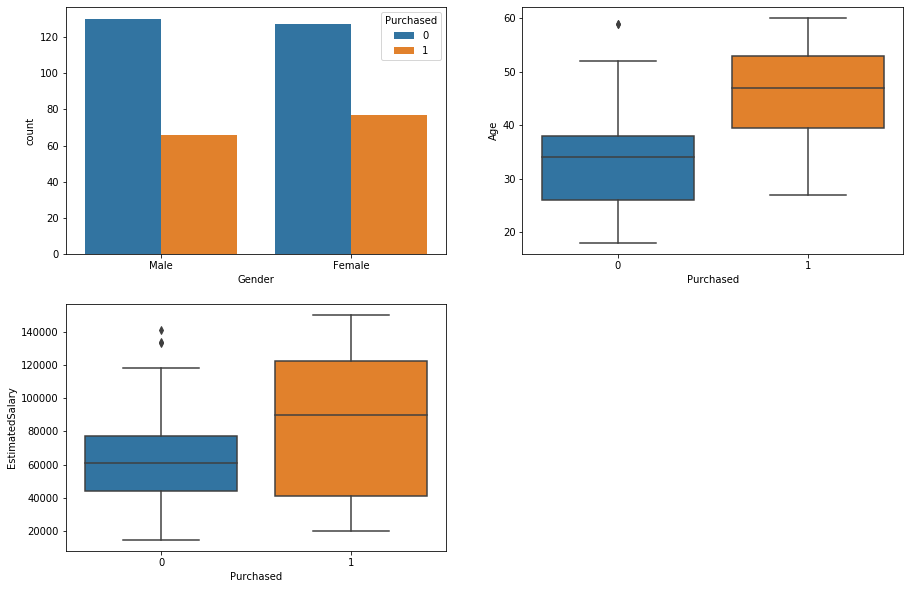

In [7]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(df['Gender'], hue = df['Purchased'])

plt.subplot(2,2,2)
sns.boxplot(x = df['Purchased'], y = df['Age'])

plt.subplot(2,2,3)
sns.boxplot(x = df['Purchased'], y = df['EstimatedSalary'])

- The product was gender netural
- The product was for adult age group
- This product was marketed to those customers who were employed or have higher avg salary.

## Pre-Processing

In [8]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [10]:
df['Gender'].replace({'Male':1, 'Female':0}, inplace = True)

In [11]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0

In [12]:
X = df.drop(columns = 'Purchased')
y = df['Purchased']

**Train-Test Split**

In [13]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7,
                                                   random_state = 100,
                                                   stratify = y)

In [33]:
X_train.head()

User ID  Gender  Age  EstimatedSalary
66   15679760       1   24            19000
266  15721592       1   40            75000
136  15668504       0   20            82000
348  15579212       1   39            77000
145  15746422       0   24            89000

In [15]:
y_train.value_counts()

0    180
1    100
Name: Purchased, dtype: int64

In [16]:
y_test.value_counts()

0    77
1    43
Name: Purchased, dtype: int64

**Scaling**

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
X_train.head()

User ID  Gender  Age  EstimatedSalary
66   15679760       1   24            19000
266  15721592       1   40            75000
136  15668504       0   20            82000
348  15579212       1   39            77000
145  15746422       0   24            89000

In [37]:
a = scaler.fit_transform(X_train.drop(columns = ['User ID', 'Gender']))
a

array([[-1.31127923, -1.45202394],
       [ 0.20512009,  0.22552803],
       [-1.69037906,  0.43522203],
       [ 0.11034513,  0.2854406 ],
       [-1.31127923,  0.64491603],
       [ 0.86854479,  1.18412916],
       [ 0.39467   ,  0.22552803],
       [-0.2687547 ,  0.2854406 ],
       [-0.83740444,  0.46517832],
       [ 0.77376983, -1.3321988 ],
       [ 0.67899487,  1.90308001],
       [-1.40605419, -1.18241738],
       [ 0.67899487, -1.24232995],
       [ 0.39467   ,  0.67487231],
       [ 1.43719453,  0.13565918],
       [ 1.62674444,  1.7233423 ],
       [-0.2687547 , -1.21237366],
       [ 0.67899487, -1.06259224],
       [ 0.86854479, -0.5233791 ],
       [ 1.81629436, -1.24232995],
       [-1.78515402,  0.52509089],
       [-0.55307957,  0.55504717],
       [-0.2687547 , -1.42206766],
       [ 0.86854479, -0.7330731 ],
       [ 1.81629436,  1.63347344],
       [ 0.01557017,  0.37530946],
       [ 0.20512009, -0.3136851 ],
       [ 1.91106932,  0.82465374],
       [-0.2687547 ,

In [39]:
a = pd.DataFrame(a)
a

0         1
0   -1.311279 -1.452024
1    0.205120  0.225528
2   -1.690379  0.435222
3    0.110345  0.285441
4   -1.311279  0.644916
..        ...       ...
275  0.110345  1.154173
276  0.394670 -0.403554
277 -0.458305 -1.092549
278  0.868545 -1.122505
279 -0.268755  0.225528

[280 rows x 2 columns]

In [42]:
a.columns = X_train.columns[2:]

In [43]:
a

Age  EstimatedSalary
0   -1.311279        -1.452024
1    0.205120         0.225528
2   -1.690379         0.435222
3    0.110345         0.285441
4   -1.311279         0.644916
..        ...              ...
275  0.110345         1.154173
276  0.394670        -0.403554
277 -0.458305        -1.092549
278  0.868545        -1.122505
279 -0.268755         0.225528

[280 rows x 2 columns]

In [53]:
X_train['Gender'].reset_index().drop(columns = ['index'])

Gender
0         1
1         1
2         0
3         1
4         0
..      ...
275       1
276       1
277       1
278       0
279       1

[280 rows x 1 columns]

In [48]:
X_train_scale = pd.concat([a, X_train['Gender'].reset_index().drop(columns = ['index'])], axis = 1)

In [49]:
X_train_scale.head()

Age  EstimatedSalary  Gender
0 -1.311279        -1.452024       1
1  0.205120         0.225528       1
2 -1.690379         0.435222       0
3  0.110345         0.285441       1
4 -1.311279         0.644916       0

**Scaling test data**

In [54]:
a = scaler.transform(X_test.drop(columns = ['User ID', 'Gender']))
a = pd.DataFrame(a)
a.columns = X_test.columns[2:]
X_test_scale = pd.concat([a, X_test['Gender'].reset_index().drop(columns = ['index'])], axis = 1)
X_test_scale.head()

Age  EstimatedSalary  Gender
0 -0.932179         0.495135       0
1 -0.079205         0.105703       0
2  0.773770        -0.792986       0
3 -1.311279        -0.373598       1
4 -0.458305         2.442293       0

## Logistic Regression Modelling

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred = lr.predict(X_test_scale)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall/Sensitivity: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.8333333333333334
Recall/Sensitivity:  0.6744186046511628
Precision:  0.8285714285714286
F1 Score:  0.7435897435897435


## Tune Probability Cutoff

In [60]:
prob = X_train[['User ID']]

In [61]:
prob.head()

User ID
66   15679760
266  15721592
136  15668504
348  15579212
145  15746422

In [62]:
prob['y-Actual'] = y_train

In [63]:
prob.head()

User ID  y-Actual
66   15679760         0
266  15721592         0
136  15668504         0
348  15579212         0
145  15746422         0

In [64]:
lr.predict_proba(X_train_scale)

        # P(y=0|x)    p(y=1|x)

array([[0.99412902, 0.00587098],
       [0.53461761, 0.46538239],
       [0.99256602, 0.00743398],
       [0.57448704, 0.42551296],
       [0.97890904, 0.02109096],
       [0.16398089, 0.83601911],
       [0.58138186, 0.41861814],
       [0.85661072, 0.14338928],
       [0.94885692, 0.05114308],
       [0.56583983, 0.43416017],
       [0.13546319, 0.86453681],
       [0.99674381, 0.00325619],
       [0.59844948, 0.40155052],
       [0.47945398, 0.52054602],
       [0.06975993, 0.93024007],
       [0.02080184, 0.97919816],
       [0.92649806, 0.07350194],
       [0.55841629, 0.44158371],
       [0.4829263 , 0.5170737 ],
       [0.17168887, 0.82831113],
       [0.98794435, 0.01205565],
       [0.89932564, 0.10067436],
       [0.93852912, 0.06147088],
       [0.37779416, 0.62220584],
       [0.01474421, 0.98525579],
       [0.74202947, 0.25797053],
       [0.65283112, 0.34716888],
       [0.02462463, 0.97537537],
       [0.93648838, 0.06351162],
       [0.77875626, 0.22124374],
       [0.

In [66]:
lr.predict_proba(X_train_scale)[:, 1]

array([0.00587098, 0.46538239, 0.00743398, 0.42551296, 0.02109096,
       0.83601911, 0.41861814, 0.14338928, 0.05114308, 0.43416017,
       0.86453681, 0.00325619, 0.40155052, 0.52054602, 0.93024007,
       0.97919816, 0.07350194, 0.44158371, 0.5170737 , 0.82831113,
       0.01205565, 0.10067436, 0.06147088, 0.62220584, 0.98525579,
       0.25797053, 0.34716888, 0.97537537, 0.06351162, 0.22124374,
       0.00435912, 0.01562039, 0.24779392, 0.46804249, 0.0080911 ,
       0.07388172, 0.9335106 , 0.00835246, 0.97595929, 0.2073428 ,
       0.97252927, 0.3923312 , 0.93666486, 0.02201083, 0.50500375,
       0.30088683, 0.01533041, 0.09026565, 0.31272005, 0.52390675,
       0.02529551, 0.97239204, 0.00562174, 0.04385082, 0.59031064,
       0.60858839, 0.09925258, 0.22648388, 0.03469843, 0.26712784,
       0.82691299, 0.01687392, 0.03651327, 0.03249845, 0.69445136,
       0.31391706, 0.12738133, 0.4739497 , 0.4428454 , 0.98181106,
       0.41555923, 0.33610493, 0.70794889, 0.25223944, 0.36536

In [67]:
prob['p(y=1|x)'] = lr.predict_proba(X_train_scale)[:, 1]

In [68]:
prob.head()

User ID  y-Actual  p(y=1|x)
66   15679760         0  0.005871
266  15721592         0  0.465382
136  15668504         0  0.007434
348  15579212         0  0.425513
145  15746422         0  0.021091

In [69]:
cut = [float(x)/10 for x in range(0,11)]

In [70]:
cut

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [71]:
for i in cut:
    prob[i] = prob['p(y=1|x)'].map(lambda x: 1 if x>i else 0)

In [72]:
prob.head()

User ID  y-Actual  p(y=1|x)  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
66   15679760         0  0.005871    1    0    0    0    0    0    0    0   
266  15721592         0  0.465382    1    1    1    1    1    0    0    0   
136  15668504         0  0.007434    1    0    0    0    0    0    0    0   
348  15579212         0  0.425513    1    1    1    1    1    0    0    0   
145  15746422         0  0.021091    1    0    0    0    0    0    0    0   

     0.8  0.9  1.0  
66     0    0    0  
266    0    0    0  
136    0    0    0  
348    0    0    0  
145    0    0    0

In [73]:
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'recall', 'precision'])

for i in cut:
    a = accuracy_score(prob['y-Actual'], prob[i])
    r = recall_score(prob['y-Actual'], prob[i])
    p = precision_score(prob['y-Actual'], prob[i])
    
    cutoff_df.loc[i] = [i, a, r, p]

In [74]:
cutoff_df

prob  accuracy  recall  precision
0.0   0.0  0.357143    1.00   0.357143
0.1   0.1  0.700000    0.99   0.543956
0.2   0.2  0.767857    0.97   0.610063
0.3   0.3  0.821429    0.92   0.686567
0.4   0.4  0.842857    0.82   0.759259
0.5   0.5  0.853571    0.72   0.847059
0.6   0.6  0.817857    0.60   0.845070
0.7   0.7  0.807143    0.52   0.896552
0.8   0.8  0.782143    0.44   0.897959
0.9   0.9  0.725000    0.27   0.870968
1.0   1.0  0.642857    0.00   0.000000

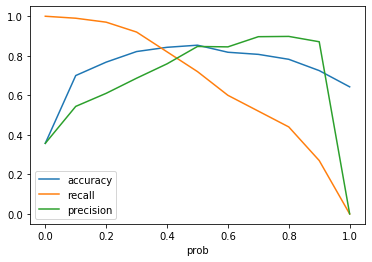

In [75]:
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'recall', 'precision'])

- final cutoff: 0.4

In [78]:
y_test_pred_prob = lr.predict_proba(X_test_scale)[:,1]

In [80]:
y_test_pred_prob

array([0.04271712, 0.17957964, 0.40267464, 0.01557767, 0.43815453,
       0.82255354, 0.00255394, 0.97231726, 0.01217293, 0.03628698,
       0.00751326, 0.16753098, 0.90959426, 0.00897341, 0.07131898,
       0.95798589, 0.23429727, 0.0062975 , 0.34822935, 0.5714549 ,
       0.00148691, 0.00916143, 0.00152388, 0.13300109, 0.00944761,
       0.67643206, 0.85571564, 0.08467054, 0.69345833, 0.60603954,
       0.02049499, 0.16438859, 0.2073428 , 0.948367  , 0.91050512,
       0.99707562, 0.08856184, 0.29284959, 0.15638656, 0.0746467 ,
       0.35968078, 0.00831382, 0.00539318, 0.34204144, 0.0080279 ,
       0.12436898, 0.53222566, 0.95222359, 0.10790765, 0.36536501,
       0.46851406, 0.09510334, 0.01971893, 0.02814072, 0.97097457,
       0.20956527, 0.13916333, 0.02005297, 0.75057664, 0.71111522,
       0.55478202, 0.48586464, 0.06842612, 0.32217302, 0.97048762,
       0.19540775, 0.29458081, 0.46734994, 0.1075549 , 0.95968994,
       0.28796397, 0.63046146, 0.38592981, 0.92014043, 0.00933

In [83]:
y_test_04 = list(map(lambda x: 1 if x>0.4 else 0,y_test_pred_prob ))

In [84]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_test_04))
print("Recall/Sensitivity: ", recall_score(y_test, y_test_04))
print("Precision: ", precision_score(y_test, y_test_04))
print("F1 Score: ", f1_score(y_test, y_test_04))

Accuracy:  0.8833333333333333
Recall/Sensitivity:  0.8372093023255814
Precision:  0.8372093023255814
F1 Score:  0.8372093023255814


In [86]:
X_test.head()

User ID  Gender  Age  EstimatedSalary
44   15715541       0   28            84000
111  15660200       0   37            71000
395  15691863       0   46            41000
86   15694946       1   24            55000
103  15675949       0   33           149000

In [88]:
X_test['predicted_label'] = y_test_04

In [89]:
X_test

User ID  Gender  Age  EstimatedSalary  predicted_label
44   15715541       0   28            84000                0
111  15660200       0   37            71000                0
395  15691863       0   46            41000                1
86   15694946       1   24            55000                0
103  15675949       0   33           149000                1
..        ...     ...  ...              ...              ...
125  15697020       0   39            61000                0
317  15684861       1   35            55000                0
19   15621083       0   48            29000                1
74   15592877       1   32            18000                0
38   15671766       0   26            72000                0

[120 rows x 5 columns]